In [ ]:
!pip install tensorflow==2.12.0 tensorflow-probability==0.20.0

In [ ]:
!pip install d2l==1.0.3


# Concise Implementation of Recurrent Neural Networks



This programming task will show you how to implement
a language model more efficiently
using a simple recurrent neural network.


In [1]:
import tensorflow as tf
from d2l import tensorflow as d2l

## [**Defining the Model**]

We define the following class
using the RNN implemented
by high-level APIs.


In [2]:
class RNN(d2l.Module):  #@save
    """The RNN model implemented with high-level APIs."""
    def __init__(self, num_hiddens):
        super().__init__()
        self.save_hyperparameters()
        self.rnn = tf.keras.layers.SimpleRNN(
            num_hiddens, return_sequences=True, return_state=True,
            time_major=True)

    def forward(self, inputs, H=None):
        outputs, H = self.rnn(inputs, H)
        return outputs, H

Inheriting from the `RNNLMScratch` class in the following `RNNLM` class defines a complete RNN-based language model.
Note that we need to create a separate fully connected output layer.


In [3]:
class RNNLM(d2l.RNNLMScratch):  #@save
    """The RNN-based language model implemented with high-level APIs."""
    def init_params(self):
        self.linear = tf.keras.layers.Dense(self.vocab_size)

    def output_layer(self, hiddens):
        return tf.transpose(self.linear(hiddens), (1, 0, 2))

## Training and Predicting
We begin by loading *The Time Machine* dataset.

Before training the model, let's [**make a prediction
with a model initialized with random weights.**]
Given that we have not trained the network,
it will generate nonsensical predictions.


In [4]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn = RNN(num_hiddens=32)
model = RNNLM(rnn, vocab_size=len(data.vocab), lr=1)
model.predict('it has', 20, data.vocab)

'it haszyajnxzvatajnoajntbu'

Next, we [**train our model, leveraging the high-level API**].


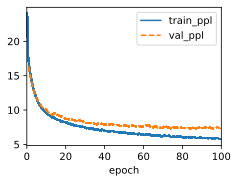

In [5]:
with d2l.try_gpu():
    trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1)
trainer.fit(model, data)

Perplexity (PPL) is the loss function to measures the language model quality

We can generate predicted tokens
following the specified prefix string.


In [6]:
model.predict('it has', 20, data.vocab)

'it has in and the the the '